# Zadaća 2
##### Rok za predaju: 10. ožujka, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs, make_circles
from sklearn import preprocessing
from sklearn.linear_model import Perceptron

## Zadatak 1 (5)
Zadan vam je model perceptrona sa parametrima $\theta =[\theta_1 ,\theta_2]= [2.5, 3]$. <br>
Skicirajte (nacrtajte) klasifikacijsku hiperravninu (pravac) definiranu ovim parametrima. Klasificira li ispravno ovaj model sljedeće podatke
$$X= [(0,-0.8), (-1,0), (-0.5, -0.5), (0,1), (0.5,0.8)]$$
sa pripadnim oznakama klasa 
$$y = [-1,-1,-1,-1,1]. $$


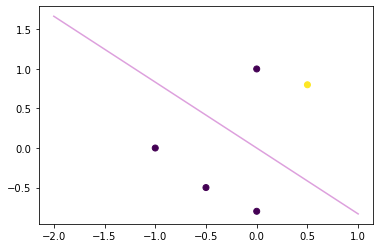

In [25]:
theta=np.array([2.5,3.0])
X=np.array([(0,-0.8),(-1,0),(-0.5,-0.5),(0,1),(0.5,0.8)])
y=np.array([-1,-1,-1,-1,1])

x = np.arange(np.min(X)-1, np.max(X)+1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x,(-theta[0]/theta[1])*x, color='plum')

## Zadatak 2 (10)
Kao što smo na vježbama radili, pomoću perceptrona implementirajte logičke XNOR, NAND. 

___

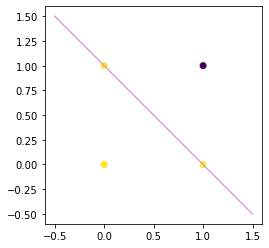

In [20]:
# NAND
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([1,1,1,-1])
plt.scatter(X[:,0], X[:,1], c=y)

theta = np.array([1,1,1])
plt.plot(np.arange(-0.5,2), (-theta[1]/theta[2]*np.arange(-0.5,2) + theta[0]), color='plum')
plt.gca().set_aspect('equal')  
plt.show()

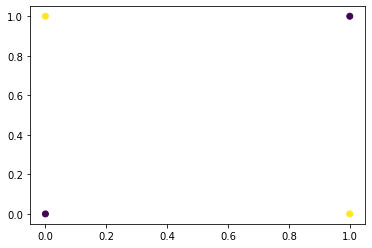

In [22]:
# XNOR

X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([-1,1,1,-1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

XNOR je linearno ne seperabilan

## Zadatak 3 (15+10)
---
Vaš zadatak će biti implementirati perceptron koji će rješavati problem klasifikacije podataka s obzirom na jednu od dvije klase $\{ 1, -1\}$.

Na predavanju je pokazan perceptron algoritam za podatke koji su linearno separabilni kroz ishodište. Drugim riječima, definirali smo da su podaci $\{ (x^{(i)}, y^{(i)}) : i=1,\cdots,m\}$ linearno separabilni kroz ishodište ako postoji $\theta = [\theta_1, \cdots, \theta_n]$ takav da je $y^{(i)} \theta ^T x^{(i)} > 0$, $\forall i = 1,\cdots, m$. 

U zadaći želimo ovaj koncept generalizirati tako da separabilnost ne bude nužno kroz ishodište. <br>
Tada možemo reći da će podaci  $\{ (x^{(i)}, y^{(i)}) : i=1,\cdots,m\}$ biti linearno separabilni ako postoji $\theta = [\theta_0, \theta_1, \cdots, \theta_n]$ takav da je $y^{(i)} \theta ^T x^{(i)} > 0$, $\forall i = 1,\cdots, m$, pri čemu je svaki podatak oblika $x^{(i)} = [1, x_1^{(i)}, \cdots, x_n^{(i)}]$.


1. Implementirajte algoritam perceptrona koji na ulazu ima  argumente: $X \in \mathbb{R}^{(m\times (n+1))} $ i $y \in \mathbb{R}^{(m\times 1)} $, gdje je $m$ ukupan broj ulaznih podataka, a $n$ broj varijabli ulaznog podatka. <br> Algoritam treba vratiti vektor parametera $\theta \in \mathbb{R}^{(n+1)\times 1}$ i broj $k$ koji predstavlja koliko je puta ažurirana vrijednost $\theta$. Kao što je pokazano na predavanju, algoritam treba ciklički prolaziti kroz podatke i prilagođavati parametre. 

2. Učitajte podatke koji su vam dani X_a.csv i y_a.csv te na njima pokrenite algoritam iz prethodnog zadatke. Ispište dobivenu vrijednost parametara $\theta$ i broj ažuriranja $k$. To ponovite na podacima X_b.csv i y_b.csv

_Dalje ćemo u zadacima govoriti paralelno za oba skupa podataka i uvesti oznake s indeksima $a$ tj. $b$ koje će se odnositi na podatke iz  X_a.csv tj. X_b.csv_


3. Izračunajte vrijednosti $\gamma_{geom}^a$ i  $\gamma_{geom}^b$ vašeg klasifikatora, tj. najmanju udaljenost podatka do hiperravnine određene formulom $\theta_a ^{T} x = 0$ odnosno hiperravnine $\theta_b ^{T} x = 0$ za podatke iz drugog skupa. 
4.  Vizualizirajte podatke $X_a$ i dobiveni dobiveni pravac $\theta_a x = 0$ te analogno podatke $X_b$ i pravac $\theta_b x = 0$. Na oba grafička prikaza treba biti naznačeno pripadanje podataka jednoj od dvije klase. 
5. Na temelju zadatka 3. i 4. interpretirajte koji je od ova dva problema teži za klasificirati. 

6. U analizi ovog algoritma, napravljena je pretpotstavka o tome kako su norme svih podataka ograničene s nekim brojem $R$. Izračunajte te brojeve $R$ za vaše skupove podataka. 

In [6]:
def LoadData(pathX,pathY):
    X = pd.read_csv(pathX)
    Y = pd.read_csv(pathY)
    
    X = X.to_numpy()
    X = np.c_[np.ones(X.shape[0]),X]
    Y = Y.to_numpy()
    return X,Y
    

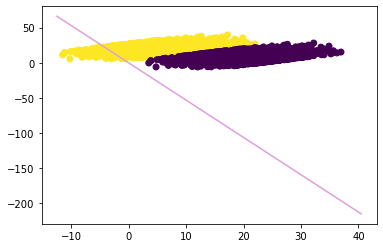

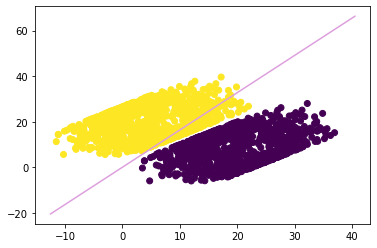

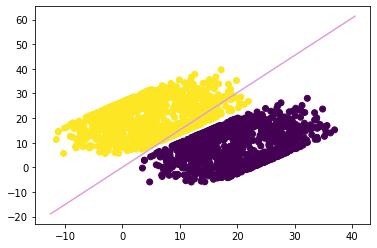

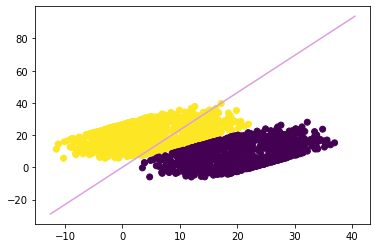

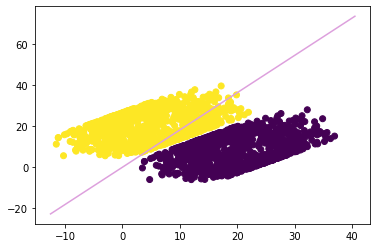

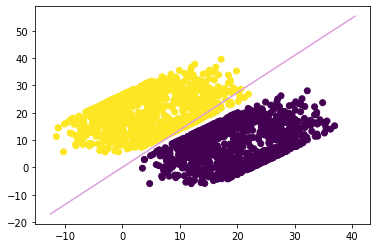

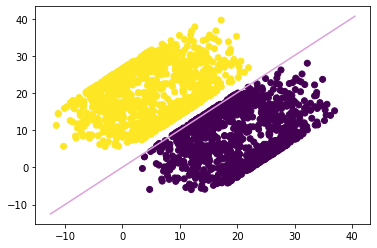

--------------------------------------------


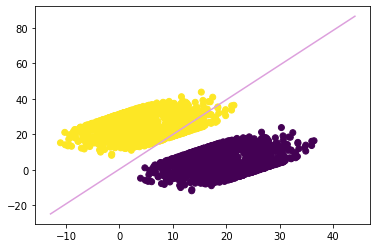

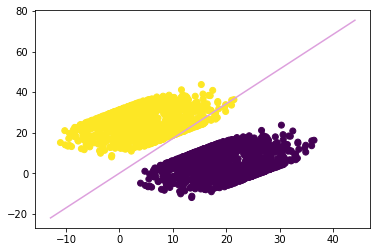

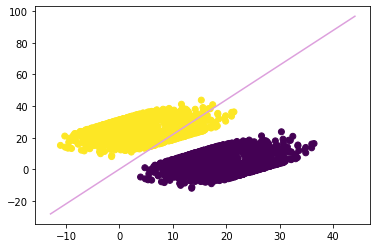

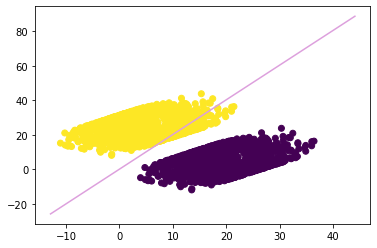

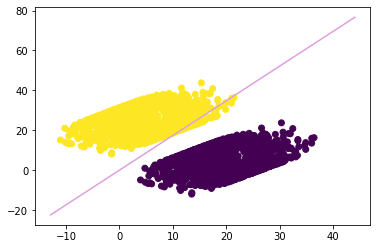

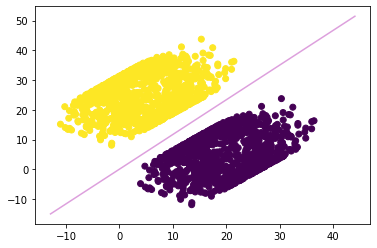

(array([ -2.        , -63.88662382,  63.64508767]),
 array([ -2.        , -58.98404447,  50.57748303]),
 18,
 12)

In [13]:
def Prediction(theta, rowX):
    return 1 if(np.dot(theta, rowX) >= 0) else -1

def MyPerceptron(X,y):
    k = 0
    numRows = X.shape[0]
    numColumns = X.shape[1]
    theta = np.zeros(numColumns)
    
    convergence = False
    while(not(convergence)):
        for i in range(numRows):
            if(not(y[i] == Prediction(theta, X[i]))):
                theta = theta + y[i]*X[i]
                k = k + 1
        
        plt.scatter(X[:,1], X[:,2], c = y)
        x = np.arange(np.min(X)-1, np.max(X)+1)
        plt.plot(x, -theta[0]/theta[2]-(theta[1]/theta[2])*x, color='plum')
        plt.show()
        
        convergence = True
        for i in range(numRows):
            if(y[i]*np.dot(theta,X[i]) < 0):
                convergence = False
    return [theta, k]
                              
X_a, Y_a = LoadData('./X_a.csv', './y_a.csv')
theta_a, k_a = MyPerceptron(X_a,Y_a)
print("--------------------------------------------")
X_b, Y_b = LoadData('./X_b.csv', './y_b.csv')
theta_b, k_b = MyPerceptron(X_b,Y_b)

theta_a, theta_b, k_a, k_b

$ k \leq (\frac{\| \theta^* \| R}{\gamma})^2 = (\frac{R}{\gamma_{geom}})^2 \Rightarrow k \leq (\frac{R}{\gamma_{geom}})^2 \Rightarrow \gamma_{geom} \leq \frac{R}{\sqrt{k}} $ 


In [8]:
def GeometricMargin(X, k):
    R = 0
    numRows = X.shape[0]
    for i in range(numRows):
        R = max(R,np.linalg.norm(X[i]))
    
    geometricMargin = R / np.sqrt(k)
    
    return geometricMargin

gamma_a = GeometricMargin(X_a,k_a)
gamma_b = GeometricMargin(X_b,k_b)

gamma_a, gamma_b

(10.186360583821168, 13.39506909661676)

zbog nejednakosti $  k \leq (\frac{R}{\gamma_{geom}})^2  $ što je $\gamma$ veći to je k manji, odnosno broj iteracija je manji, pa jer je gamma_b veci njegov broj iteracija je manji odnosno drugi skup je lakse za izracunat nego prvi.

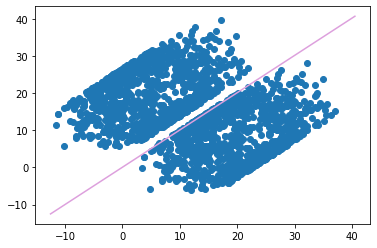

In [9]:
plt.scatter(X_a[:,1], X_a[:,2])
x = np.arange(np.min(X_a)-1, np.max(X_a)+1)
plt.plot(x, -theta_a[0]/theta_a[2]-(theta_a[1]/theta_a[2])*x, color='plum')
plt.show()

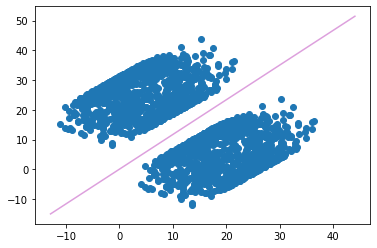

In [10]:
x = np.arange(np.min(X_b)-1, np.max(X_b)+1)
plt.scatter(X_b[:,1], X_b[:,2])
plt.plot(x, -theta_b[0]/theta_b[2]-(theta_b[1]/theta_b[2])*x, color='plum')
plt.show()

## Zadatak 4 (10)
U datotekama i su vam zadani podaci koje koje je potrebno klasificirati perceptron algoritmom. 
1. Učitajte podatke 2X_a, 2y_a vizualizirajte ih. 
2. Odredite kojom biste klasom funkcija mogli separirati ove podatke. Parametre funkcije iz te klase trebate pronaći koristeći perceptron algoritam koji ste implementirali. 
___

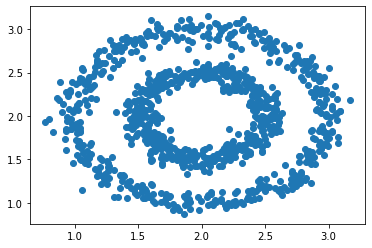

In [11]:
a, b = LoadData('2X_a.csv','2y_a.csv')
plt.scatter(a[:,1], a[:,2])

Separiramo kružnicom

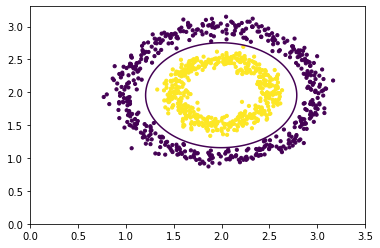

In [12]:
a = np.c_[a, a[:,1]**2, a[:,2]**2]
thetaaa, kaaa = MyPerceptron(a,b)

x = -np.linspace(-3.5,+0.0,1000)
y = np.linspace(-0.0,+3.0,1000)


X,Y = np.meshgrid(x,y)

#equation: 7.91x^2 + -0.213xy + 5.46y^2 -0.031x -0.0896y = 1
eqn = thetaaa[3]* X**2 +thetaaa[4]*Y**2+ thetaaa[1]*X+thetaaa[2]*Y
Z = -thetaaa[0]
plt.scatter(a[:,1],a[:,2],c=b,s=10)
plt.contour(X,Y,eqn,[Z])
plt.show()

## Zadatak 5 (10):
Nadogradite implementaciju perceptron algoritma tako da u svakoj iteraciji vizualizirate podatke i dobiveni pravac koji separira te podatke. <br>
Pokrenite algoritam na podacima koje ćete dobiti koristeći ugrađenu funkciju iz scikit-learn *make_blobs* sa sljedećim parametrima: <br>make_blobs(n_samples=500, n_features=2, centers=2, random_state=4).

Opišite dobiveni rezultat. 

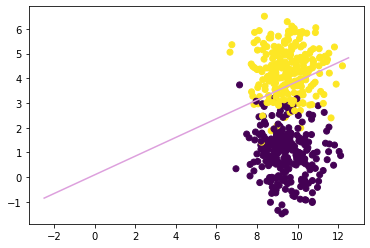

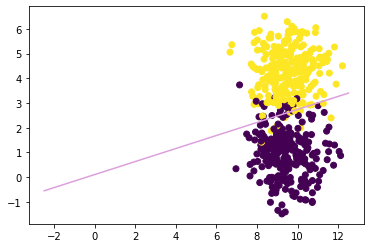

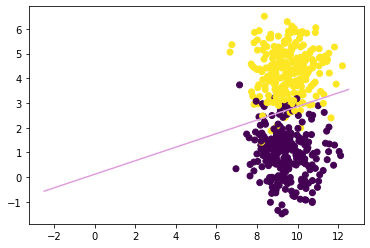

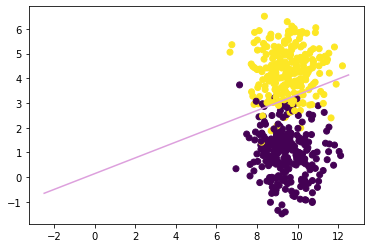

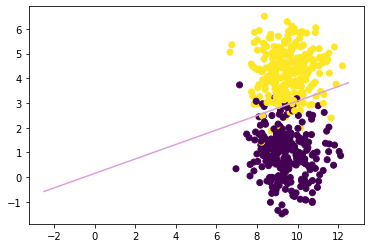

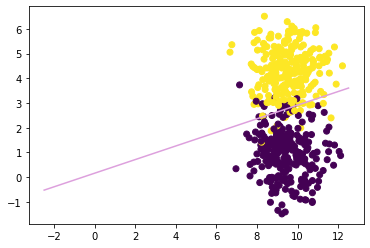

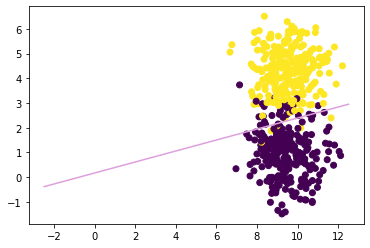

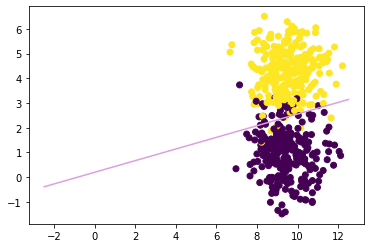

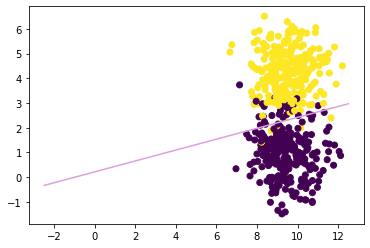

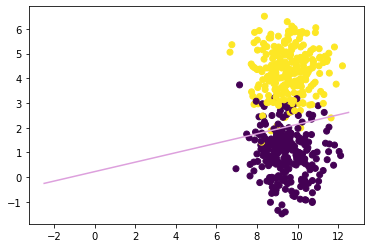

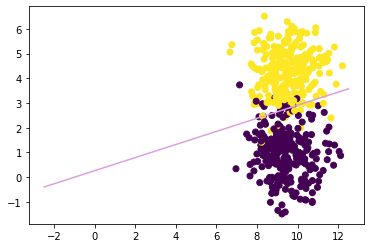

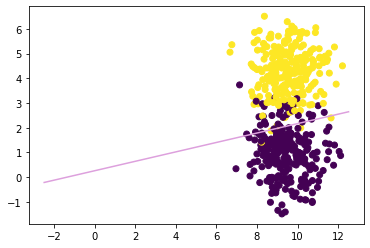

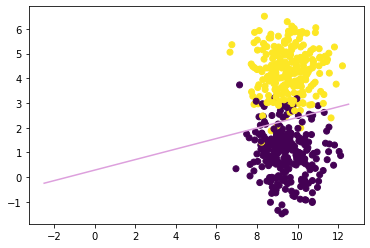

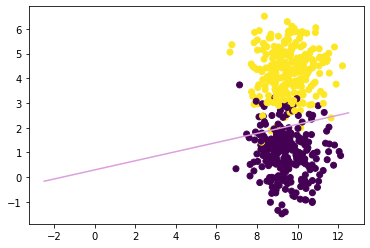

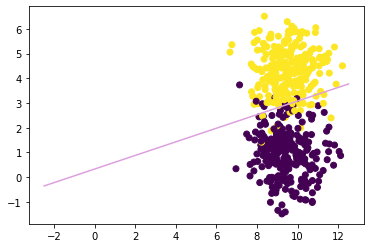

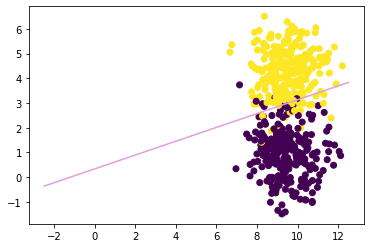

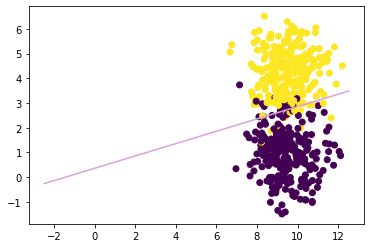

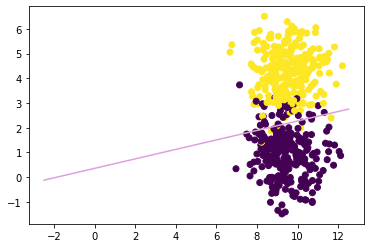

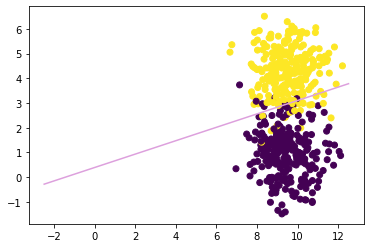

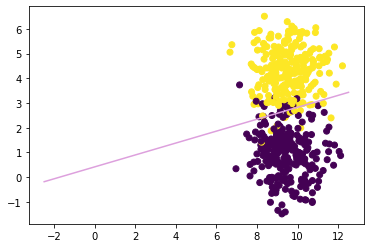

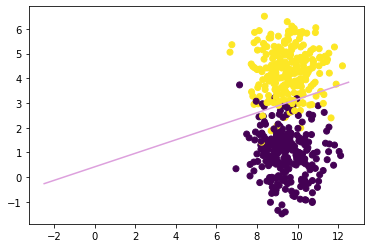

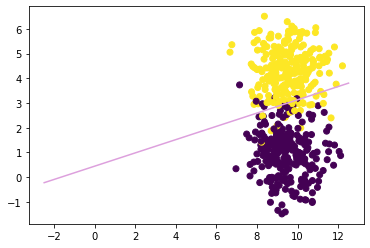

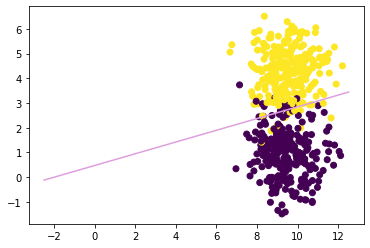

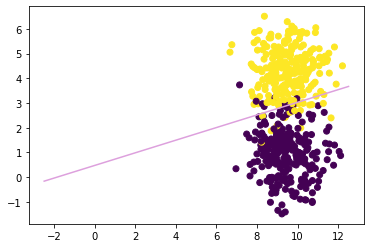

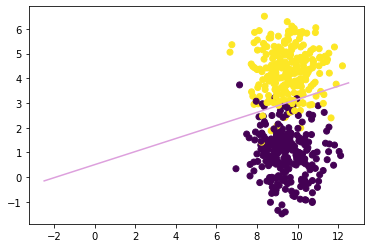

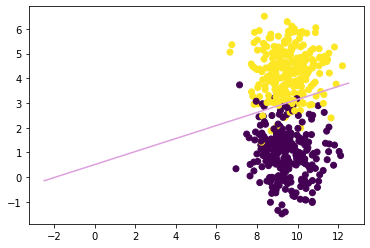

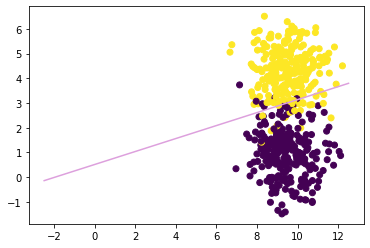

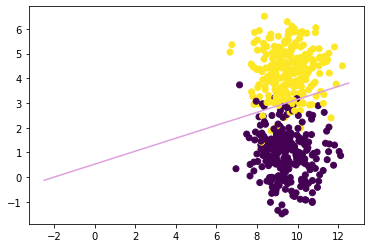

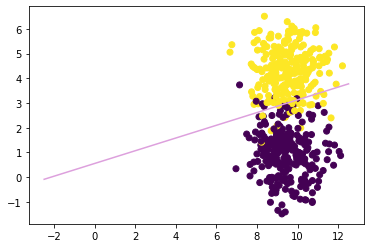

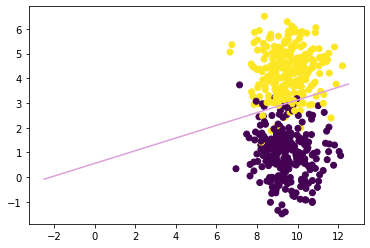

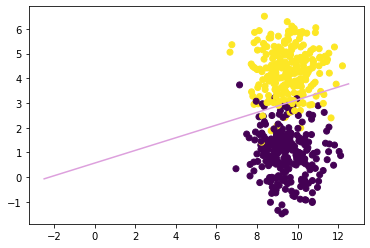

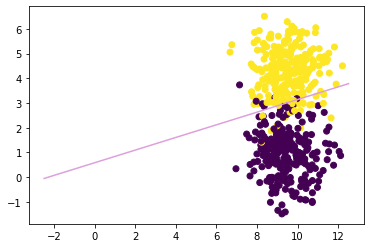

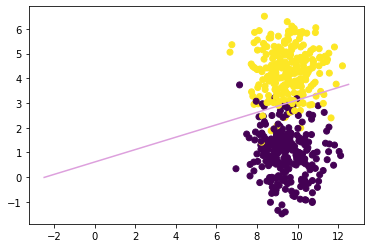

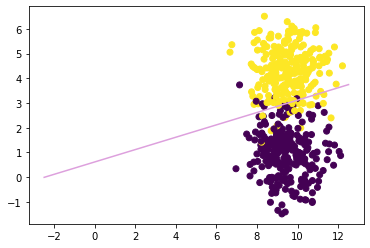

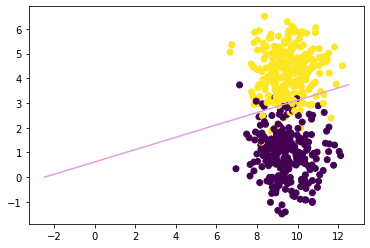

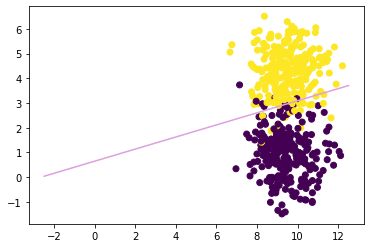

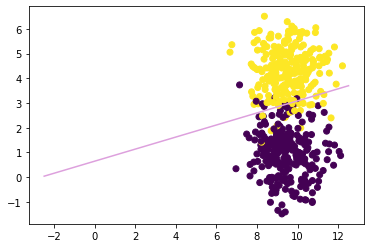

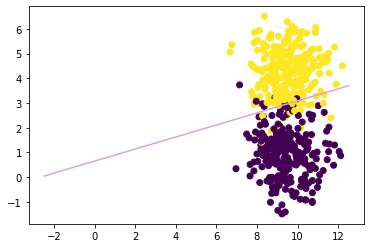

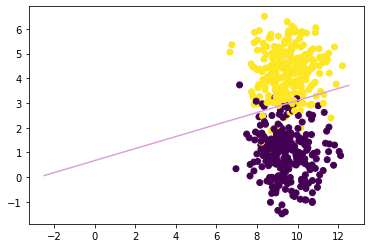

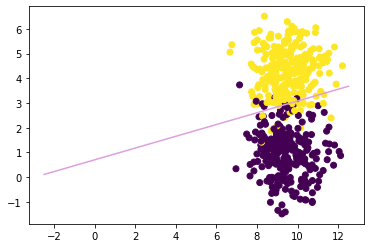

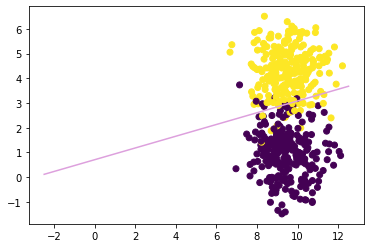

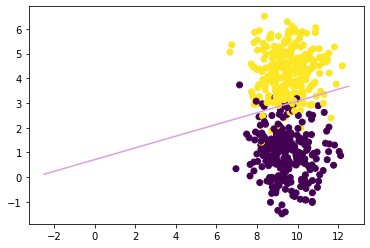

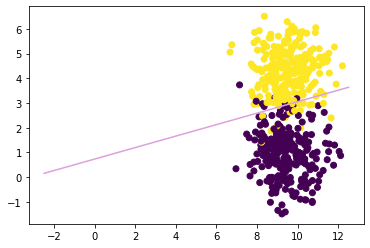

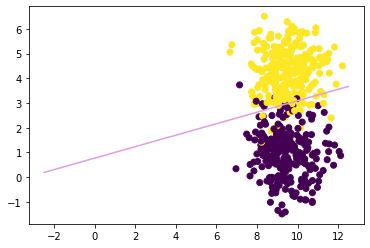

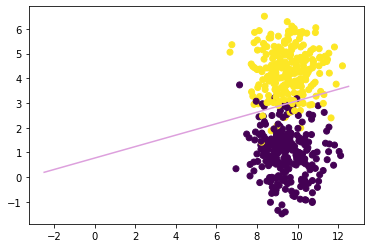

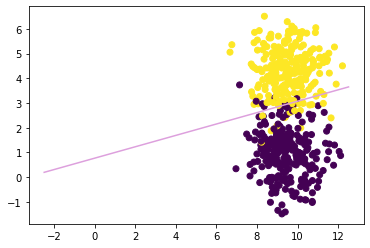

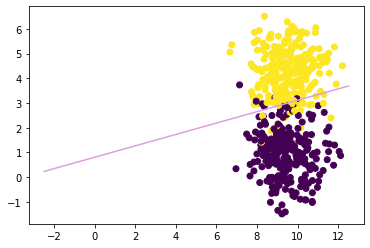

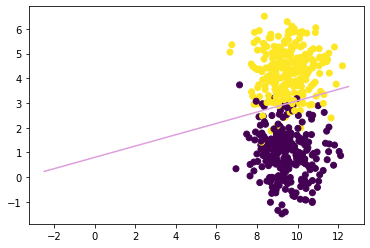

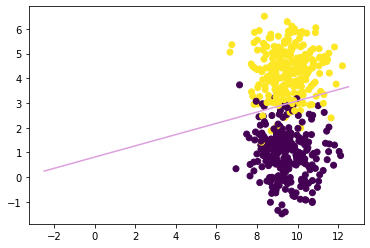

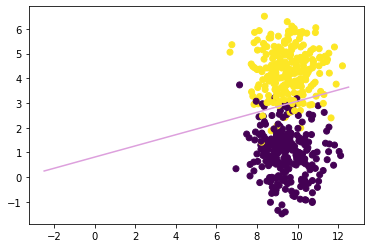

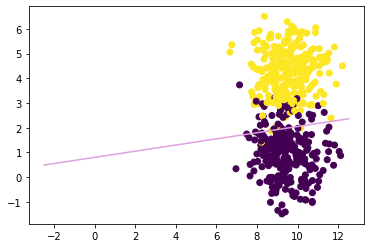

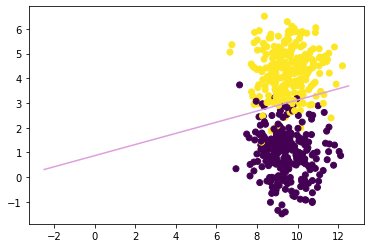

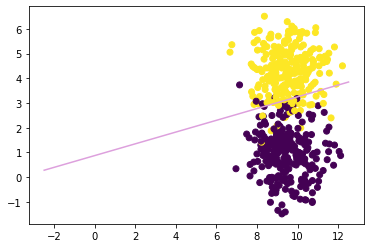

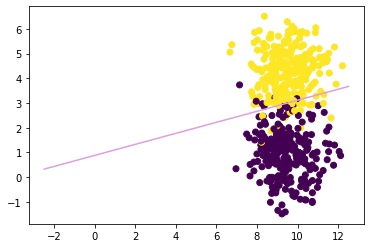

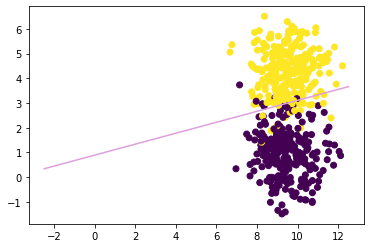

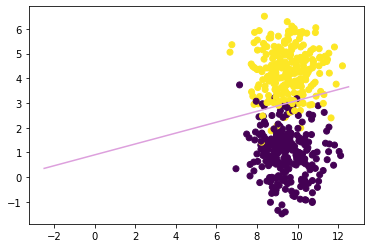

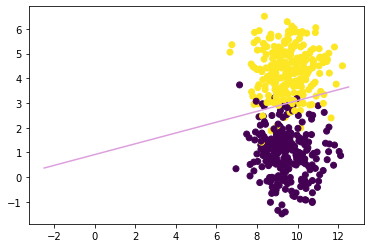

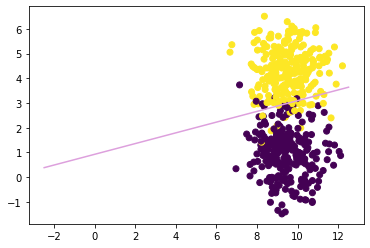

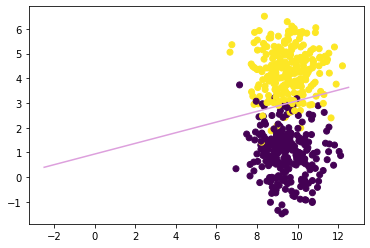

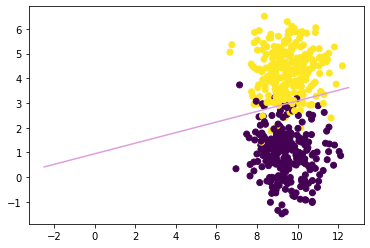

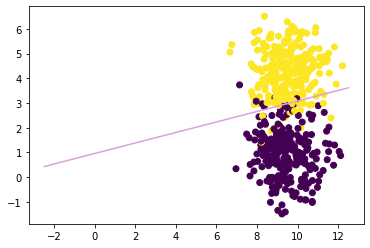

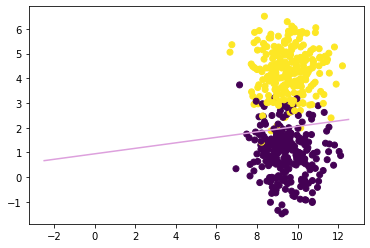

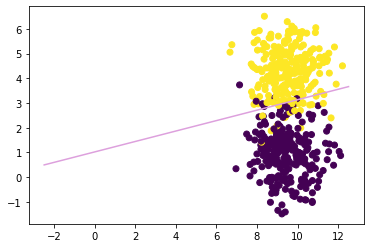

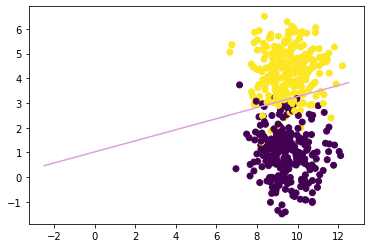

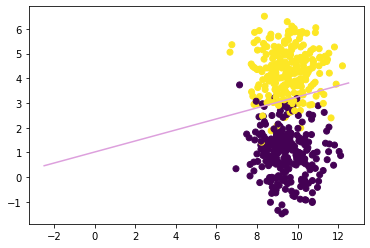

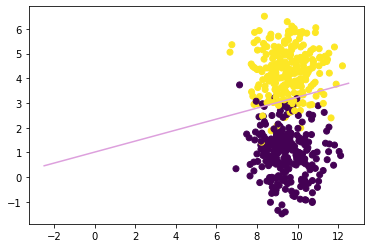

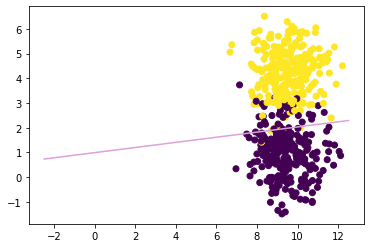

KeyboardInterrupt: 

In [14]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=4)
X = np.c_[np.ones(X.shape[0]),X]
y = [-1 if(t == 0) else t for t in y]
y = np.array(y)

MyPerceptron(X,y)